<a href="https://colab.research.google.com/github/orkunguldali/MachineLearningFundamentalsLecture/blob/main/Lab5_FeedforwardNeuralNetworks_CongressionalVotingProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
path_to_dataset = '/content/drive/MyDrive/voting_complete.csv' # change the PATH
pd_dataset = pd.read_csv(path_to_dataset)

In [3]:
pd_dataset

,Unnamed: 0,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [4]:
# define a function for train and test split

def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_ammount = int(len(index)*test_ratio)
    train_ids = index[train_ammount:]
    test_ids = index[:train_ammount]

    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()

    train_dataset = train_dataset[train_dataset.columns[1:]]
    test_dataset = test_dataset[test_dataset.columns[1:]]

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]

In [5]:
x_train, y_train, x_test, y_test = train_test_split(pd_dataset)


In [6]:
x_train

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,y,n,y,n,?,n,y,y,y,y,n,y,n,?,y,y
344,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
345,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
346,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [7]:
y_train = y_train.replace('republican',1)
y_train = y_train.replace('democrat',0)
x_train = x_train.replace('y',1)
x_train = x_train.replace('n',0)
x_train = x_train.replace('?',0.5)

In [8]:
print(y_train)
print(x_train)

0      1
1      1
2      0
3      0
4      0
      ..
343    0
344    0
345    1
346    1
347    1
Name: Class Name, Length: 348, dtype: int64
     handicapped-infants  water-project-cost-sharing  \
0                    0.0                         1.0   
1                    0.0                         1.0   
2                    0.5                         1.0   
3                    0.0                         1.0   
4                    1.0                         1.0   
..                   ...                         ...   
343                  1.0                         0.0   
344                  0.0                         0.0   
345                  0.0                         0.5   
346                  0.0                         0.0   
347                  0.0                         1.0   

     adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
0                                  0.0                   1.0              1.0   
1                     

In [9]:
model = Sequential()
model.add(InputLayer(input_shape=(len(x_train.columns))))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 68        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 87 (348.00 Byte)
Trainable params: 87 (348.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train, epochs=100, batch_size=5, verbose=1,validation_split=0.2)

Epoch 1/100
56/56 [==============================] - 0s 7ms/step - loss: 0.0464 - accuracy: 0.9856 - val_loss: 0.0673 - val_accuracy: 0.9857
Epoch 2/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0415 - accuracy: 0.9892 - val_loss: 0.0836 - val_accuracy: 0.9714
Epoch 3/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0438 - accuracy: 0.9856 - val_loss: 0.0825 - val_accuracy: 0.9857
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9892 - val_loss: 0.0862 - val_accuracy: 0.9714
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9892 - val_loss: 0.0847 - val_accuracy: 0.9857
Epoch 6/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0426 - accuracy: 0.9820 - val_loss: 0.0923 - val_accuracy: 0.9714
Epoch 7/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0415 - accuracy: 0.9820 - val_loss: 0.1001 - val_accuracy: 0.9571
Epoch 8/100
5

In [22]:
y_test = y_test.replace('republican',1)
y_test = y_test.replace('democrat',0)
x_test = x_test.replace('y',1)
x_test = x_test.replace('n',-1)
x_test = x_test.replace('?',0)

In [23]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 94.25


Text(0, 0.5, 'loss')

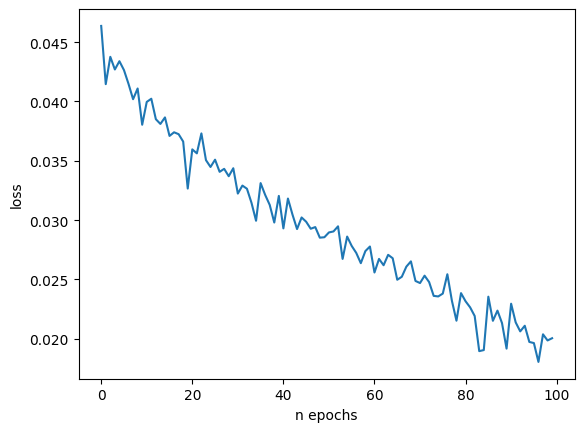

In [24]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

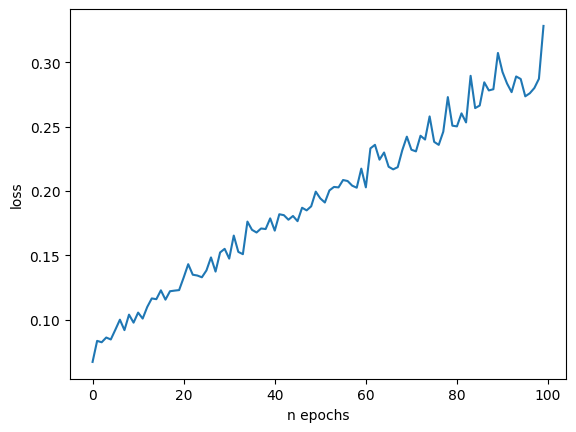

In [27]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

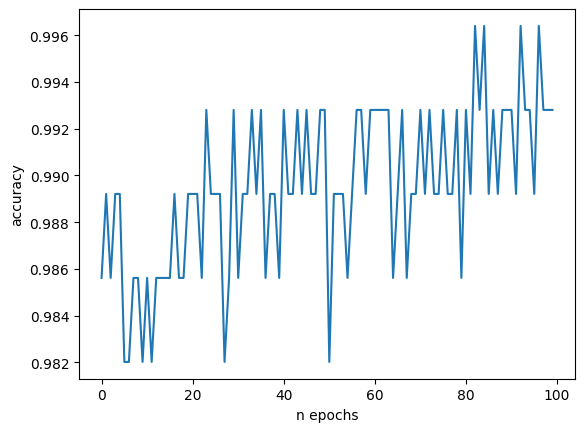

In [25]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('n epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'validation_accuracy')

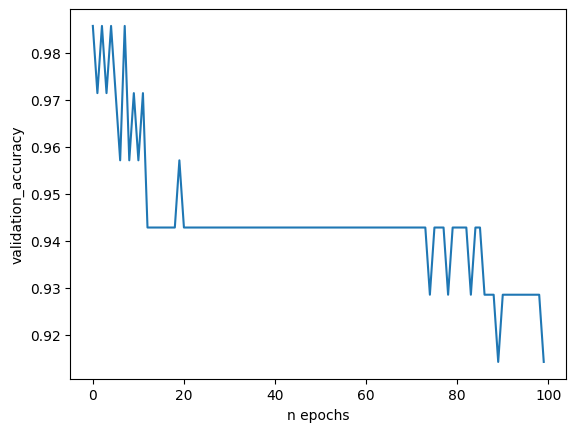

In [26]:
plt.figure()
plt.plot(history.history['val_accuracy'])
plt.xlabel('n epochs')
plt.ylabel('validation_accuracy')

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy'])